<a href="https://colab.research.google.com/github/rupesh743/Airline_Passenger_Referral/blob/main/RG%5BAirline_Passenger_Referral%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Airline Passenger Referral Prediction**



##### **Project Type**    - EDA/Classification
##### **Contribution**    - Team
##### **Rupesh Gandhi**
##### **Nalini Ranjan**
##### **Deepak Kumar**
##### **DEDANIYA PRITKUMAR PRADIPBHAI**

# **Project Summary -**

The project will utilize a dataset containing airline reviews. Each review in the dataset is associated with a sentiment or category label, indicating whether it is positive, negative, or neutral, or if it belongs to a specific category like customer service, in-flight experience, baggage handling, etc. The dataset consists of various features such as the review text, airline name, reviewer's rating, and other relevant information.

**Data Preprocessing:**
Before building the classification model, the dataset will undergo preprocessing steps.

**Feature Extraction:**
To represent the textual data in a machine-readable format, appropriate feature extraction techniques will be applied.

**Model Development:**
Various supervised machine learning classification algorithms will be explored for the project, such as Naive Bayes, Support Vector Machines (SVM), Random Forest, or Logistic Regression.

**Model Evaluation and Optimization:**
Once the models are trained, they will be evaluated on the testing set to measure their performance.

**Insights and Results:**
The final classification model will be used to predict the sentiment or category of new, unseen airline reviews.



# **GitHub Link -**

https://github.com/rupesh743/Airline_Passenger_Referral.git

# **Problem Statement**


 To develop a supervised machine learning classification model that can accurately predict the sentiment or category of airline reviews. 
 
 The goal is to analyze customer feedback and opinions towards different airlines and their services, enabling airlines to gain insights and make data-driven decisions to improve customer satisfaction.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from wordcloud import WordCloud
import missingno as msno

%matplotlib inline

import lightgbm

import warnings
warnings.filterwarnings('ignore')

# Importing all models from sklearn to be used in our model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import pearsonr
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
!pip install scikit-optimize
from sklearn.neighbors import KNeighborsClassifier
from skopt import BayesSearchCV
from sklearn.svm import SVC
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.3 MB/s eta 0:00:00


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

df_Airline = pd.read_excel('/content/drive/MyDrive/data_airline_reviews.xlsx')

Mounted at /content/drive


### Dataset First View

In [3]:
#dataset first view
df_Airline.head(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df_Airline.shape

(131895, 17)

### Dataset Information

In [5]:
# Dataset Info
df_Airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df_Airline.duplicated().sum()
#Drop Duplicate
df_Airline.drop_duplicates(inplace = True)

#Check Again
df_Airline.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df_Airline.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

<Axes: >

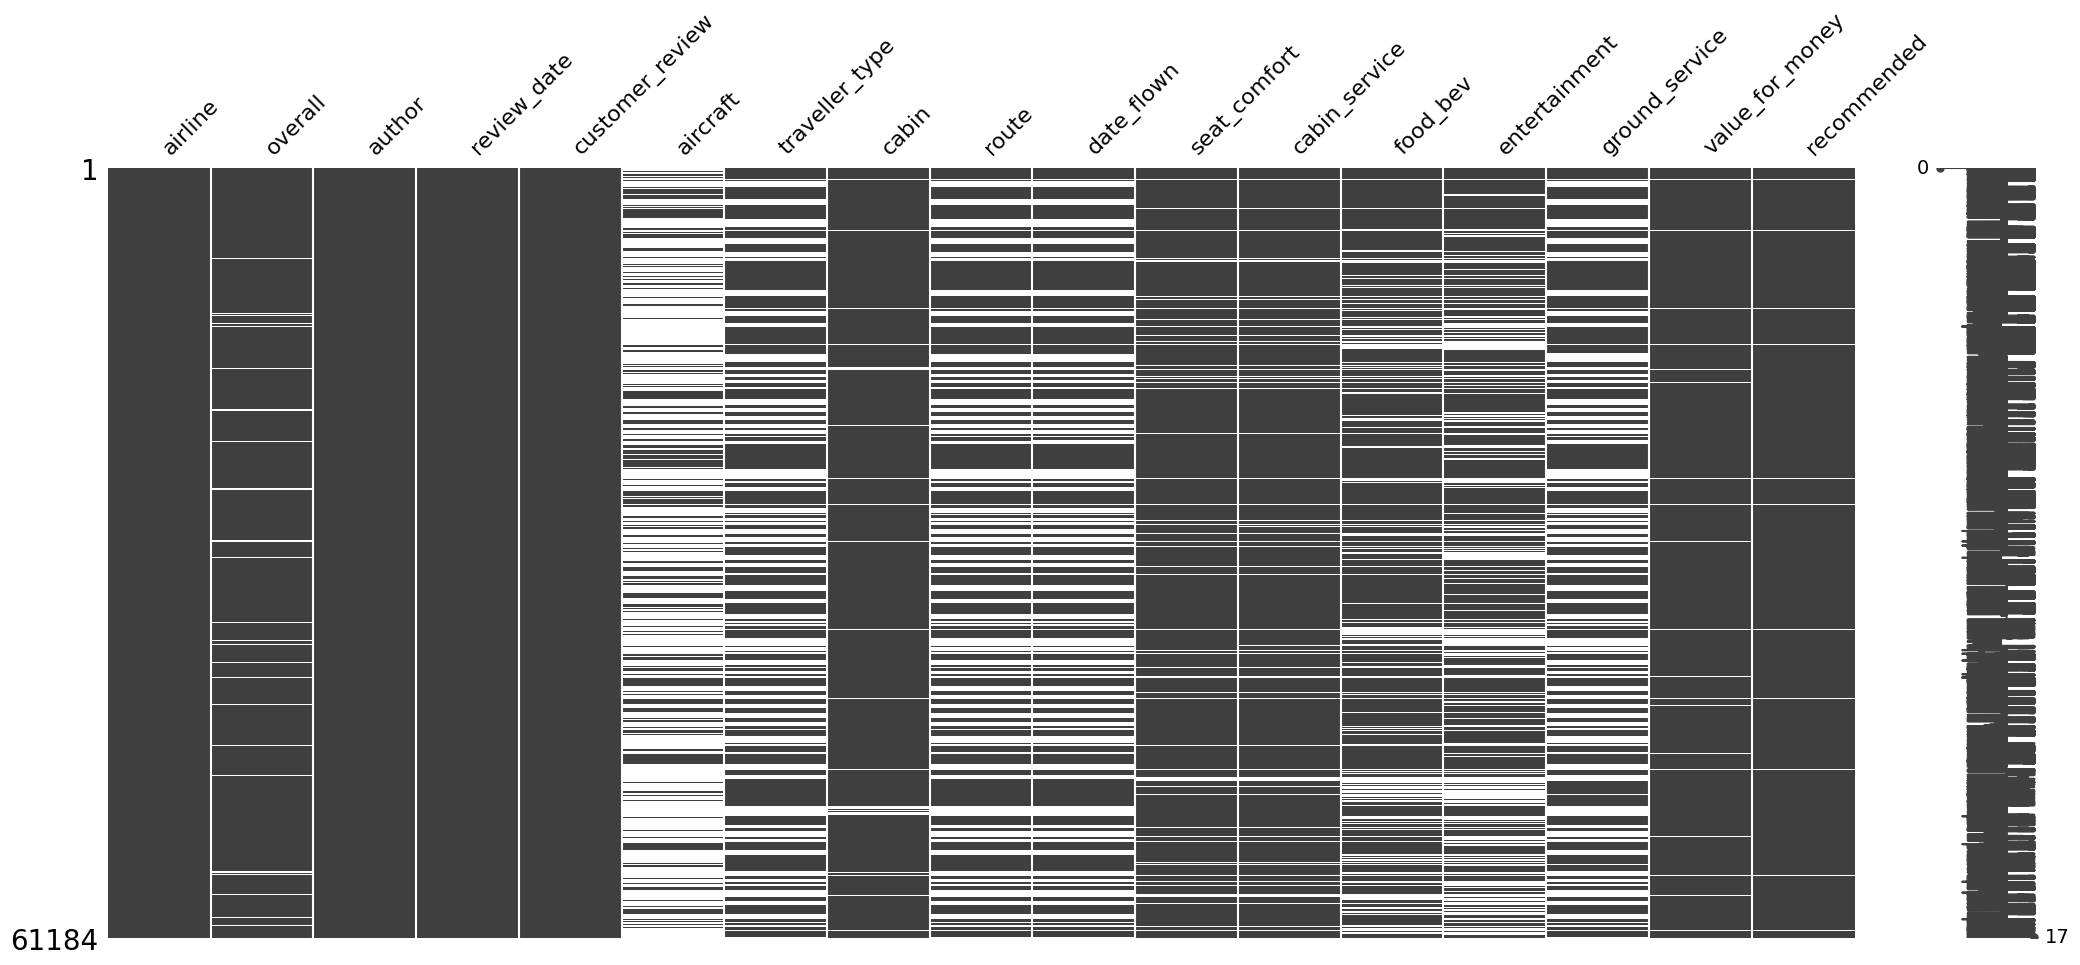

In [8]:
# Visualizing the missing values
msno.matrix(df_Airline)

### What did you know about your dataset?

The dataset, df_Airline, consists of **131,895 rows and 17 columns**, containing a combination of numeric and categorical data types. Numeric columns such as overall, seat_comfort, cabin_service, food_bev, entertainment, ground_service, and value_for_money are represented as float64, representing ratings or scores. Object data type columns hold string values, including attributes like airline, author, review_date, customer_review, aircraft, traveller_type, cabin, route, date_flown, and recommended. The dataset exhibits **missing values across multiple columns**, evident from the Non-Null Count column in df_Airline.info(). Columns with missing data include airline, overall, author, review_date, customer_review, aircraft, traveller_type, cabin, route, date_flown, seat_comfort, cabin_service, food_bev, entertainment, ground_service, value_for_money, and recommended. **Duplicate values were initially present in the dataset but were removed using df_Airline.drop_duplicates(inplace=True).** Visualization of missing values using **msno.matrix(df_Airline)** highlights blank spaces and white lines in the matrix, indicating the presence of missing values within the respective columns. Further analysis and preprocessing steps may be necessary based on the specific requirements of the project.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df_Airline.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [10]:
# Dataset Describe
df_Airline.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,59401.0,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
seat_comfort,56211.0,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0
cabin_service,56240.0,3.200231,1.568429,1.0,2.0,3.0,5.0,5.0
food_bev,48341.0,2.926956,1.483122,1.0,1.0,3.0,4.0,5.0
entertainment,40230.0,2.887994,1.504452,1.0,1.0,3.0,4.0,5.0
ground_service,37169.0,2.681347,1.613995,1.0,1.0,3.0,4.0,5.0
value_for_money,59327.0,2.950849,1.588433,1.0,1.0,3.0,4.0,5.0


### Variables Description 

The dataset appears to contain customer reviews of Airlines. Here is a variable description for the dataset:

**airline**: The name of the airline.

**overall**: The overall rating given by the customer for the flight experience.

**author**: The author of the review.

**review_date**: The date when the review was posted.

**customer_review**: The text of the customer's review.

**aircraft**: The aircraft used for the flight (if specified in the review).

**traveller_type**: The type of traveler (e.g., Business, Family Leisure, Solo Leisure) as mentioned by the reviewer.

**cabin**: The cabin class (e.g., Economy Class, Business Class) as mentioned by the reviewer.

**route**: The route of the flight.

**date_flown**: The date when the flight was taken.

**seat_comfort**: Rating given for seat comfort.

**cabin_service**: Rating given for cabin service.

**food_bev**: Rating given for food and beverages.

**entertainment**: Rating given for the in-flight entertainment.

**ground_service**: Rating given for ground service.

**value_for_money**: Rating given for the value for money.

**recommended**: Indicates whether the customer recommends the airline (yes or no).



### Check Unique Values for each variable.

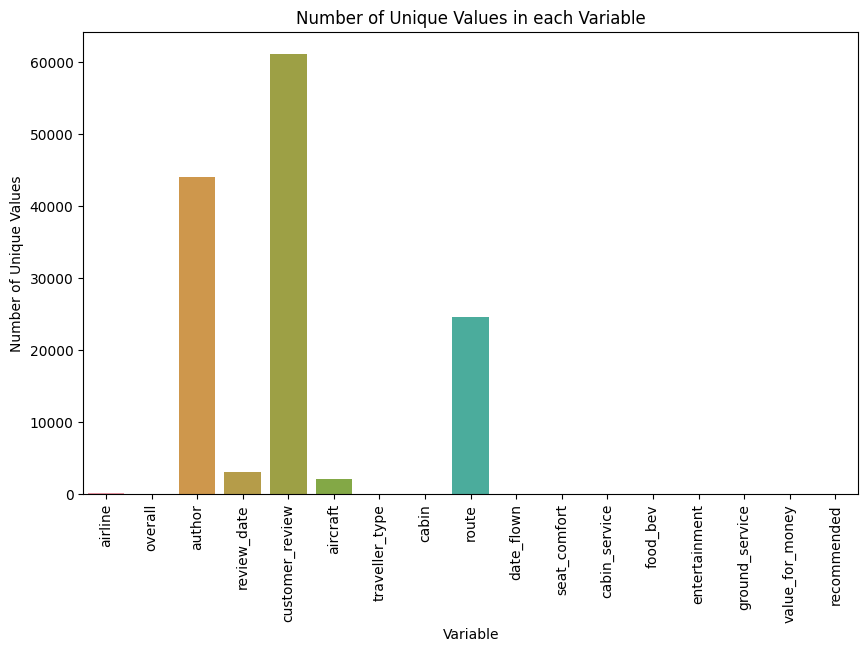

In [11]:
# Check Unique Values for each variable.
column_list = df_Airline.columns.values.tolist()
no_unique=[]
for column_name in column_list:
  no_unique.append(df_Airline[column_name].nunique())
unique = pd.DataFrame(list(zip(column_list, no_unique)),
               columns =['variable', 'no. of uniques values'])
unique.head(10)


#Graph

plt.figure(figsize=(10, 6))
sns.barplot(x='variable', y='no. of uniques values', data=unique)
plt.xlabel('Variable')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values in each Variable')
plt.xticks(rotation=90)
plt.show()

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

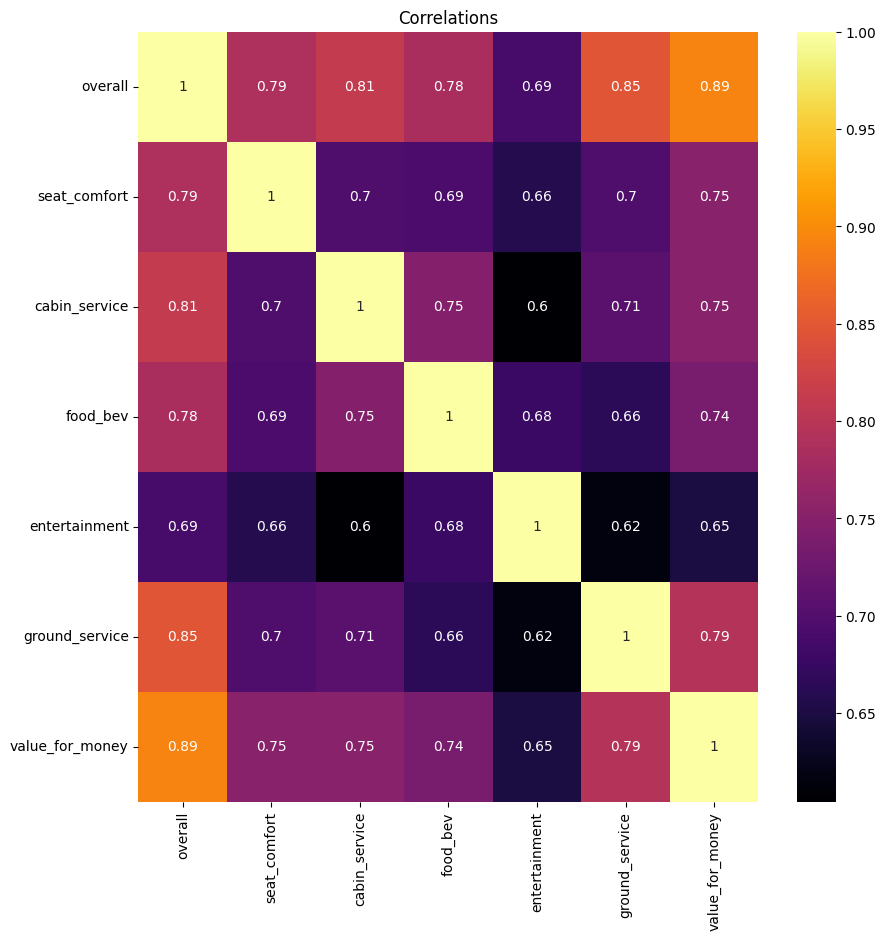

In [12]:
# Chart - 1 Corelation matrix of the dataset

corr_matrix = df_Airline.corr()

# Graph
plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='inferno', annot=True)
plt.title('Correlations')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart, a heatmap, was chosen because it effectively presents the correlation matrix by using color gradients to indicate the strength and direction of relationships between variables. Heatmaps are well-suited for visualizing correlations and allow for easy identification of patterns and dependencies.



##### 2. What is/are the insight(s) found from the chart?

The chart provides insights into the dataset by highlighting the strength and direction of correlations between variables. Darker colors indicate stronger correlations, while lighter colors indicate weaker correlations. By analyzing the heatmap, one can identify variables that exhibit strong positive or negative relationships. The fully colored diagonal line represents perfect correlation (correlation coefficient of 1) between a variable and itself.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the correlation matrix can potentially have a positive impact on business. Understanding the relationships between variables enables informed decision-making and optimization of business strategies. For example, identifying strong positive correlations suggests that changes in one variable will directly impact the other, allowing for targeted improvements or growth strategies. Conversely, recognizing negative correlations helps identify areas that may require adjustments or conflict resolution. However, the actual impact on business would depend on the specific context, dataset, and how the insights are applied and interpreted.

#### Chart - 2

In [13]:
# Chart - 2
#Top 10 recommended airlines

# Filter the dataset for recommended airlines
recommended_airlines = df_Airline[df_Airline['recommended'] == 'yes']
airline_counts = recommended_airlines['airline'].value_counts()
top_10_airlines = airline_counts.head(10)

print("Top 10 Recommended Airlines:")
for airline, count in top_10_airlines.items():
    print(airline, "-", count, "recommendations")


#Graph 

# Create the nested double pie chart
fig = go.Figure()

# Outer pie chart
fig.add_trace(go.Pie(
    labels=top_10_airlines.index,
    values=top_10_airlines.values,
    name="Top Airlines",
    hole=0.4,
    marker=dict(colors=['#FFA07A', '#FFD700', '#90EE90', '#ADD8E6', '#FF69B4', '#9370DB', '#FF6347', '#87CEEB', '#FFC0CB', '#00BFFF'])
))

# Inner pie chart
fig.add_trace(go.Pie(
    labels=['Recommendations'] * len(top_10_airlines),
    values=[1] * len(top_10_airlines),
    name="Recommendations",
    hole=0.7,
    marker=dict(colors=['#E5E5E5']),
    domain={"x": [0.15, 0.85], "y": [0.15, 0.85]}
))

# Set the title and layout
fig.update_layout(
    title='Top 10 Recommended Airlines',
    annotations=[dict(text='Recommendations', x=0.5, y=0.5, font_size=15, showarrow=False)]
)

# Display the chart
fig.show()

Top 10 Recommended Airlines:
China Southern Airlines - 1454 recommendations
British Airways - 1141 recommendations
Qatar Airways - 1101 recommendations
Lufthansa - 981 recommendations
Emirates - 944 recommendations
Qantas Airways - 872 recommendations
Cathay Pacific Airways - 803 recommendations
Singapore Airlines - 795 recommendations
Turkish Airlines - 726 recommendations
Ryanair - 692 recommendations


##### 1. Why did you pick the specific chart?

The specific chart, a nested double pie chart, was chosen because it effectively represents the proportion of recommendations for each airline within the top 10. The outer pie chart shows the distribution of recommendations among the airlines, while the inner pie chart represents the relative share of recommendations for each airline compared to the others.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart include identifying the top 10 recommended airlines and understanding their relative proportions of recommendations. The outer pie chart displays the distribution of recommendations among the airlines, allowing for a visual comparison of their popularity. The inner pie chart illustrates the proportion of recommendations each airline has within the top 10, providing insight into their individual shares of recommendations.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially have a positive business impact. By identifying the top 10 recommended airlines and understanding their proportions of recommendations, businesses in the airline industry can gain insights into customer preferences and satisfaction. This information can inform marketing strategies, customer targeting, and overall business decision-making. Additionally, it can help airlines identify areas of strength and potential areas for improvement, ultimately leading to enhanced customer satisfaction and loyalty. However, the actual impact on business would depend on the specific context, dataset, and the actions taken based on the insights gained from the chart.

#### Chart - 3

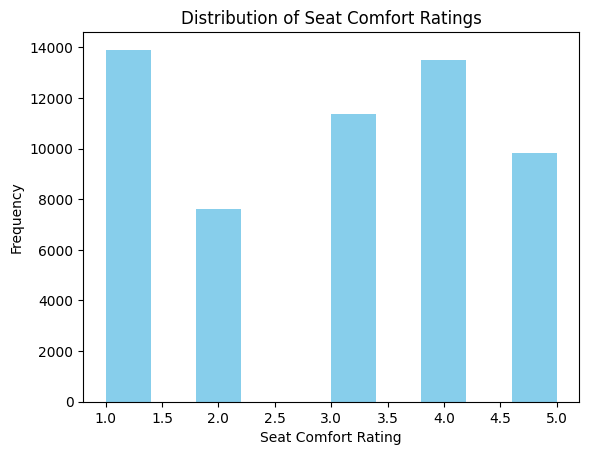

In [14]:
# Chart - 3 visualization code
#Distribution of seat comfort ratings for the airline
seat_comfort = df_Airline['seat_comfort']

#Graph
plt.hist(seat_comfort, bins=10, color='skyblue')
plt.xlabel('Seat Comfort Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Seat Comfort Ratings')

plt.show()


##### 1. Why did you pick the specific chart?

The specific chart, a histogram, was chosen because it effectively displays the distribution of seat comfort ratings. Histograms provide a visual representation of the frequency or count of data points within specified intervals or bins, allowing for an understanding of the distribution pattern.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart include understanding the distribution of seat comfort ratings among customers. The histogram displays the frequency or count of seat comfort ratings within different rating intervals or bins. It helps identify the most common or prevalent ratings as well as any patterns or variations in the distribution.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially have a positive business impact. Understanding the distribution of seat comfort ratings can provide valuable information for airlines to assess customer satisfaction and make improvements accordingly. By identifying any concentration of ratings at lower or higher levels, airlines can address specific areas of concern or prioritize enhancements to improve overall seat comfort. This can lead to increased customer satisfaction, loyalty, and positive word-of-mouth, ultimately impacting the business positively. However, the actual impact on business would depend on the specific context, dataset, and the actions taken based on the insights gained from the chart.






#### Chart - 4

<Axes: xlabel='traveller_type', ylabel='value_for_money'>

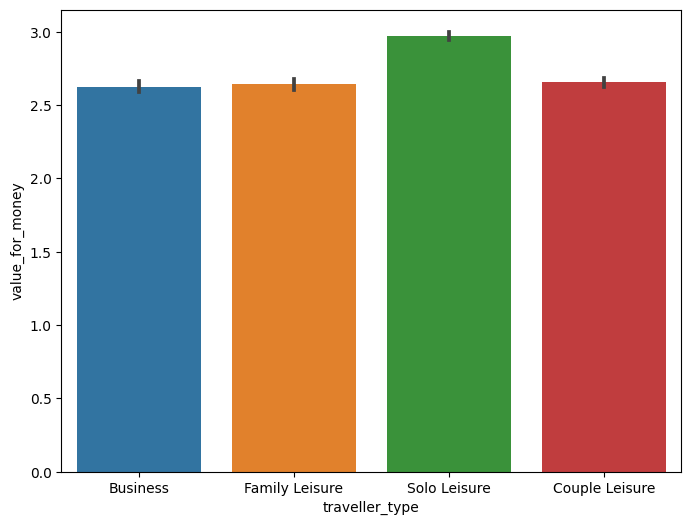

In [15]:
# Chart - 4 visualization code
# Which type of traveller type has good value for money

plt.figure(figsize=(8,6))
sns.barplot(x=df_Airline['traveller_type'],y=df_Airline['value_for_money'])


##### 1. Why did you pick the specific chart?

The specific chart, a bar chart, was chosen because it effectively compares the average value for money ratings across different traveler types. Bar charts are suitable for visualizing and comparing categorical data, making them a suitable choice for this analysis.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart include identifying which traveler type has a higher average value for money rating. By comparing the heights of the bars, you can determine which traveler type, on average, perceives better value for money. The chart allows for easy visual comparison and identification of any significant differences in value for money across traveler types.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially have a positive business impact. Understanding which traveler type perceives good value for money can help airlines tailor their offerings and marketing strategies to cater to the preferences and expectations of that specific traveler segment. It can inform pricing strategies, service enhancements, and promotional activities. By focusing on providing good value for money to the identified traveler type, airlines can increase customer satisfaction, loyalty, and positive word-of-mouth, ultimately leading to a positive impact on the business. However, the actual impact on business would depend on the specific context, dataset, and the actions taken based on the insights gained from the chart.

#### Chart - 5

<Axes: xlabel='cabin'>

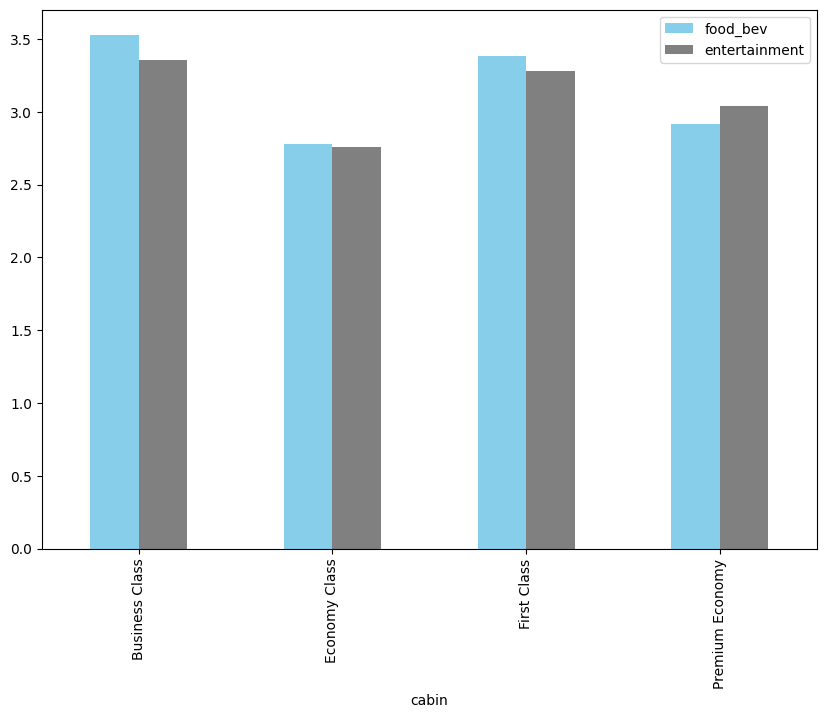

In [16]:
# Chart - 5 visualization code
# what is the average ratings of Food_bev and entertainment given by passenger in all types of cabin
cab_rate=df_Airline.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
cab_rate

#Graph

plt.rcParams['figure.figsize']=(10,7)

cab_rate.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar", color=["skyblue", "gray"])

##### 1. Why did you pick the specific chart?

The specific chart, a grouped bar chart, was chosen because it effectively compares the average ratings of food and beverage and entertainment across different cabin types. Grouped bar charts are suitable for visualizing and comparing multiple categories and their corresponding values, making them appropriate for this analysis.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart include understanding the average ratings of food and beverage and entertainment across different cabin types. By comparing the heights of the bars, you can determine which cabin type has higher average ratings in each category. The chart allows for easy visual comparison and identification of any significant differences in ratings among cabin types.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially have a positive business impact. Understanding the average ratings of food and beverage and entertainment across different cabin types can help airlines assess customer satisfaction in these areas. This information can guide decision-making processes related to in-flight services, menu offerings, entertainment options, and cabin upgrades. By addressing any discrepancies or areas of improvement identified from the chart, airlines can enhance the overall passenger experience, increase satisfaction, and build a positive brand image. However, the actual impact on business would depend on the specific context, dataset, and the actions taken based on the insights gained from the chart.

#### Chart - 6

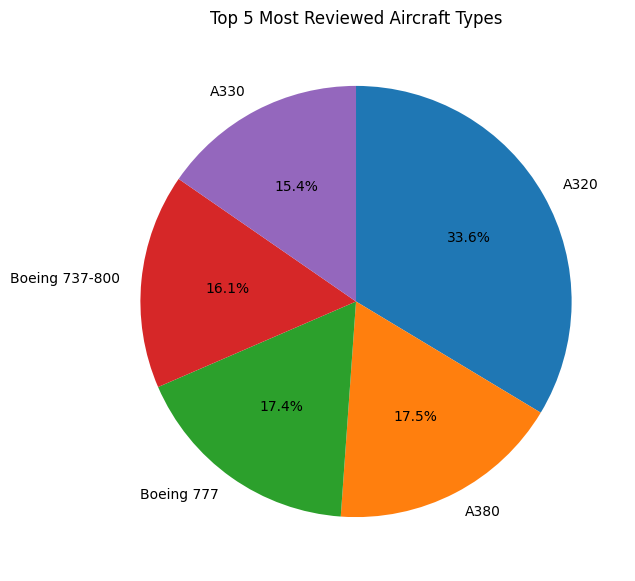

In [17]:
# Chart - 6 visualization code
# count the number of reviews for each aircraft type
aircraft_counts = df_Airline["aircraft"].value_counts()

top_aircraft = aircraft_counts.head(5)

# Graph
plt.pie(top_aircraft.values, labels=top_aircraft.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title("Top 5 Most Reviewed Aircraft Types")
plt.show()



##### 1. Why did you pick the specific chart?

The specific chart, a pie chart, was chosen because it effectively represents the distribution of reviews among the top 5 most reviewed aircraft types. Pie charts are suitable for showcasing proportions and percentages, making them an appropriate choice for this analysis.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart include understanding the distribution of reviews among the top 5 most reviewed aircraft types. Each slice of the pie represents a specific aircraft type, and the percentage label on each slice indicates its proportion relative to the total. The chart allows for easy visualization of the popularity and review distribution among the top aircraft types.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially have a positive business impact. Understanding the number of reviews for each aircraft type can provide valuable information for airlines to evaluate customer feedback and preferences. It allows them to identify the most reviewed aircraft types, which can guide decisions related to fleet management, maintenance, and upgrades. By paying attention to customer feedback and addressing any concerns or patterns identified from the reviews, airlines can improve customer satisfaction, loyalty, and overall business performance. However, the actual impact on business would depend on the specific context, dataset, and the actions taken based on the insights gained from the chart.

#### Chart - 7

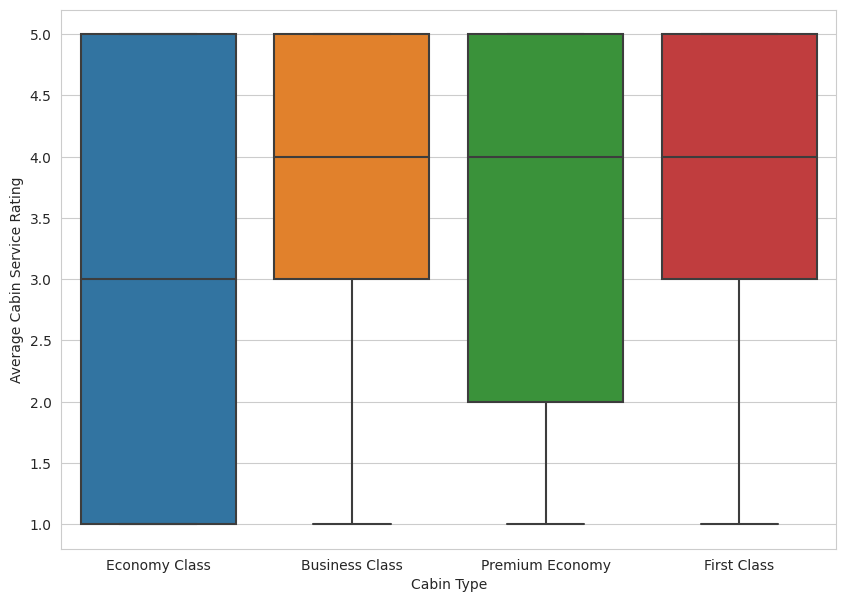

In [18]:
# Chart - 7 visualization code
# calculate the mean rating for each cabin type
avg_ratings = df_Airline.groupby('cabin')['cabin_service'].mean()


#Graph

colors = ['gold', 'mediumturquoise', 'darkorange']
fig = go.Figure(data=[go.Pie(labels=avg_ratings.index, 
                             values=avg_ratings.values,
                             textinfo='label+percent',
                             marker=dict(colors=colors)
                            )])

fig.update_layout(title='Average Ratings by Cabin Type')
fig.show()

#Box Plot
sns.set_style('whitegrid')
ax = sns.boxplot(x='cabin', y='cabin_service', data=df_Airline)
ax.set(xlabel='Cabin Type', ylabel='Average Cabin Service Rating')
plt.show()

##### 1. Why did you pick the specific chart?

Two specific charts were chosen to visualize the average ratings by cabin type. The first chart is a pie chart created using the plotly library, which provides a visual representation of the proportion of average ratings for each cabin type. The second chart is a box plot created using the seaborn library, which displays the distribution of average cabin service ratings for each cabin type.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the charts include understanding the average ratings for each cabin type and the distribution of cabin service ratings among different cabin types. The pie chart allows for easy comparison of the average ratings and identifies any differences in satisfaction levels across cabin types. The box plot provides insights into the spread and variability of ratings within each cabin type, allowing for identification of potential outliers or differences in customer experiences.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially have a positive business impact. Understanding the average ratings and distribution of cabin service ratings for each cabin type helps airlines evaluate customer satisfaction and identify areas for improvement. By analyzing the differences in average ratings and addressing any concerns or outliers identified from the box plot, airlines can take targeted actions to enhance the cabin service experience. This can lead to increased customer satisfaction, improved brand reputation, and positive word-of-mouth, ultimately impacting the business positively. However, the actual impact on business would depend on the specific context, dataset, and the actions taken based on the insights gained from the charts.

#### Chart - 8

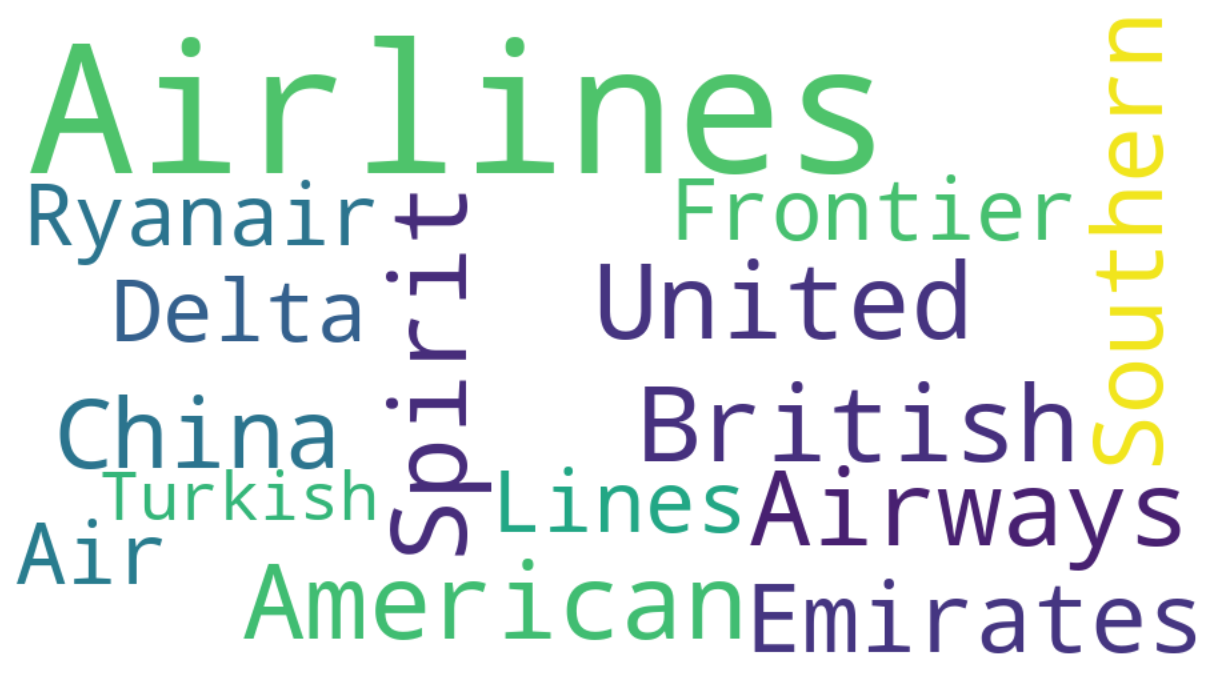

In [19]:
# Chart - 8 visualization code
# Count the occurrences of each airline in the dataset
airline_counts = df_Airline['airline'].value_counts()
airline_counts

top_airlines = list(airline_counts.index[:10])
text = ' '.join(top_airlines)


#WordCloud
wordcloud = WordCloud(width=900, height=500, background_color='white').generate(text)
                                                                              

plt.figure(figsize=(12, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


##### 1. Why did you pick the specific chart?

The specific chart, a word cloud, was chosen because it effectively displays the relative frequency or occurrence of different airlines in a visually appealing and intuitive manner. Word clouds are suitable for representing text data where the size of each word corresponds to its frequency or importance.

##### 2. What is/are the insight(s) found from the chart?

The insight gained from the chart is the visualization of the most frequently occurring airline names. The size of each airline name in the word cloud represents its frequency of occurrence in the dataset. It allows for easy identification of the top airlines based on their popularity or presence in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially have a positive business impact. Understanding the relative occurrence and popularity of different airlines can provide valuable information for market analysis, competitive positioning, and strategic decision-making. It can help airlines assess their market share, customer reach, and brand visibility compared to their competitors. By analyzing the word cloud, airlines can identify their position in the market and take appropriate actions to strengthen their market presence, improve customer satisfaction, and gain a competitive advantage. However, the actual impact on business would depend on the specific context, dataset, and the actions taken based on the insights gained from the chart.

#### Chart - 9

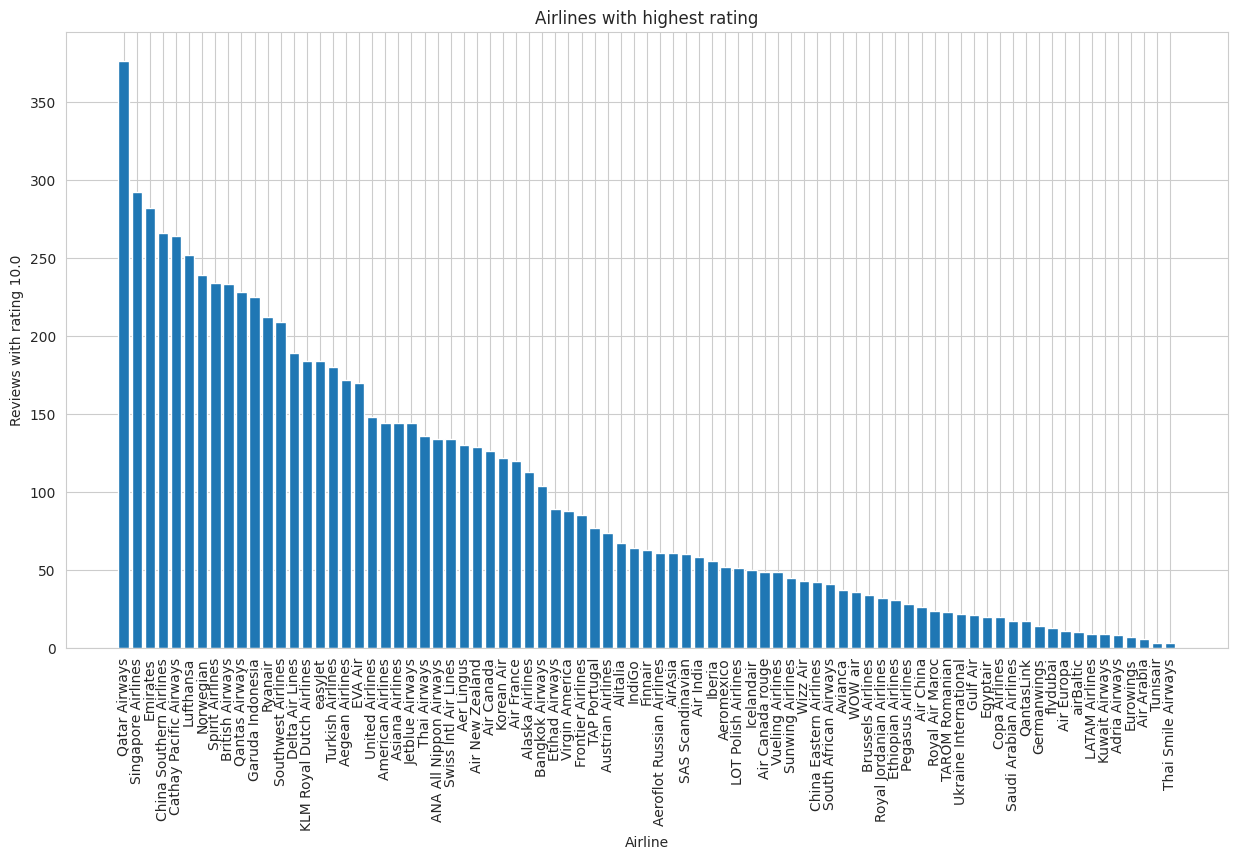

In [20]:
# Chart - 9 visualization code
# Group the reviews by route and count the number of reviews for each route
most_used_route = df_Airline.groupby(['overall','airline']).agg({'overall': ['count']})
most_used_route.columns = ['count']
most_used_route = most_used_route.reset_index()
most_used_route = most_used_route.set_index('overall')
most_used_route.head(10)

with_10_rating = most_used_route.loc[most_used_route.index == 10.0]
with_10_rating = with_10_rating.sort_values('count', ascending=False)
with_10_rating.head(10)                                



#Graph

plt.figure(figsize=(15,8))
plt.bar(with_10_rating['airline'], with_10_rating['count'])
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Reviews with rating 10.0')
plt.title('Airlines with highest rating')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart, a bar chart, was chosen because it effectively displays and compares the number of reviews with a rating of 10.0 for each airline. Bar charts are suitable for comparing categorical data, making them appropriate for this analysis.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart include identifying the airlines that have received the highest number of reviews with a rating of 10.0. By examining the heights of the bars, you can determine which airlines have been highly rated by customers. The chart allows for easy visual comparison and identification of the airlines that have achieved a significant number of top ratings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially have a positive business impact. Identifying the airlines with the highest number of top-rated reviews can help airlines understand their strengths and areas of excellence. It can guide marketing strategies, customer engagement initiatives, and quality improvement efforts. By leveraging the positive reviews and reputation, airlines can attract more customers, enhance brand loyalty, and differentiate themselves from competitors. However, the actual impact on business would depend on the specific context, dataset, and the actions taken based on the insights gained from the chart.

#### Chart - 10

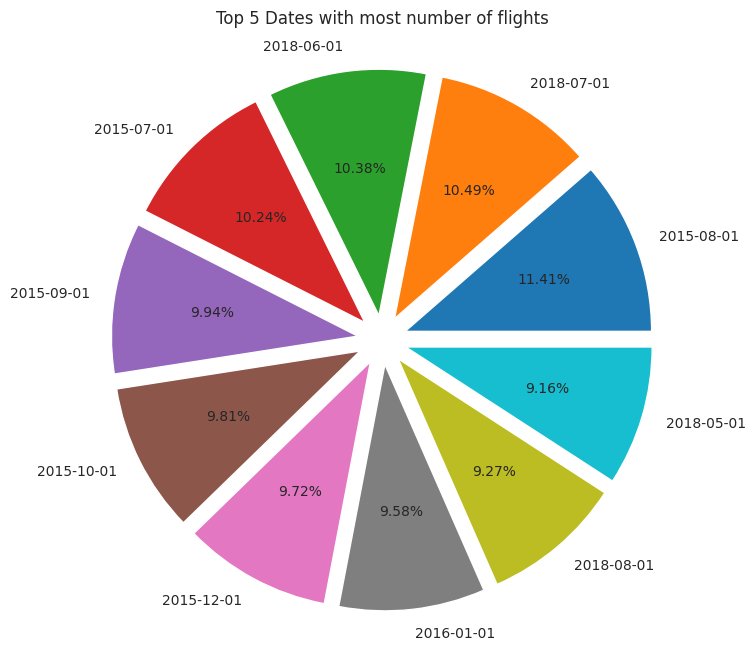

In [21]:
# Chart - 10 visualization code
# Top 10 highest no. of flight takeoff in a day
df_Airline['date_flown'] = pd.to_datetime(df_Airline['date_flown'])

most_no_flights = df_Airline.groupby('date_flown')['airline'].count()
top_five_dates = most_no_flights.sort_values(ascending=False).head(10)


#Graph
plt.figure(figsize=(8, 8))
data = top_five_dates.values
labels = top_five_dates.index.strftime('%Y-%m-%d')
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(data, labels=labels, explode=explode, autopct='%1.2f%%')
plt.title('Top 5 Dates with most number of flights')
plt.show()


##### 1. Why did you pick the specific chart?

The specific chart, a pie chart, was chosen because it effectively represents the distribution of flights among the top 10 dates with the highest number of flights. Pie charts are suitable for showcasing proportions and percentages, making them an appropriate choice for this analysis.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart include understanding the distribution of flights among the top 10 dates with the highest number of flights. Each slice of the pie represents a specific date, and the percentage label on each slice indicates its proportion relative to the total. The chart allows for easy visualization of the busiest dates in terms of flight takeoffs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially have a positive business impact. Understanding the busiest dates with the highest number of flight takeoffs can help airlines optimize their operations and resources. It allows them to allocate staff, aircraft, and other resources efficiently to meet the demand on these peak days. By analyzing the flight distribution and identifying patterns, airlines can make informed decisions regarding scheduling, capacity planning, and customer service. This can lead to improved operational efficiency, better customer experiences, and positive business outcomes. However, the actual impact on business would depend on the specific context, dataset, and the actions taken based on the insights gained from the chart.

#### Chart - 11

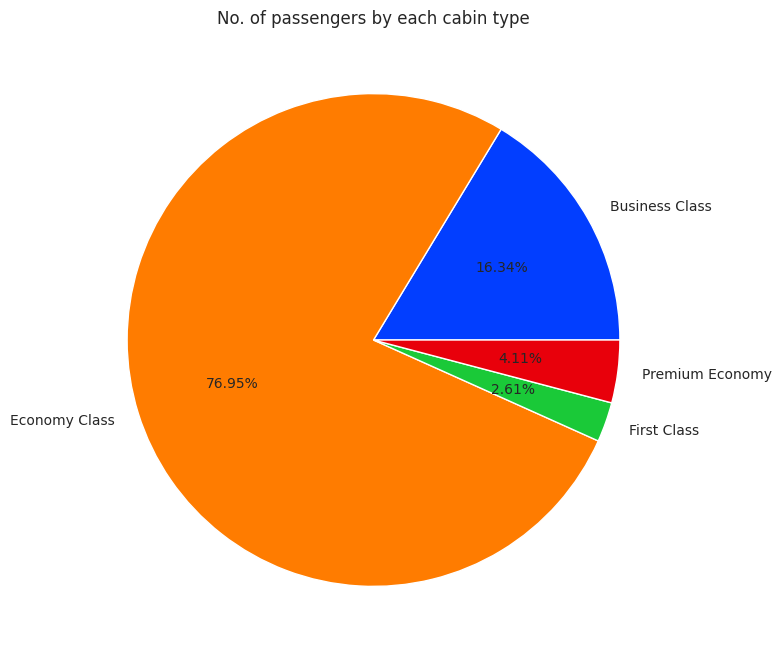

In [22]:
# Chart - 11 visualization code
# No. of passengers for each cabin class
passengers_by_cabin = df_Airline.groupby('cabin')['cabin'].count()
passengers_by_cabin



#Graph


palette_color = sns.color_palette('bright')
plt.figure(figsize=(8, 8))
explode = [0.4, 0.2, 0.3, 0.5]
plt.pie(passengers_by_cabin, labels=passengers_by_cabin.index, colors=palette_color, autopct='%1.2f%%')
plt.title('No. of passengers by each cabin type')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart, a pie chart, was chosen because it effectively represents the distribution of passengers among different cabin classes. Pie charts are suitable for showcasing proportions and percentages, making them an appropriate choice for this analysis.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart include understanding the distribution of passengers across different cabin classes. Each slice of the pie represents a specific cabin class, and the percentage label on each slice indicates its proportion relative to the total number of passengers. The chart allows for easy visualization of the passenger distribution and comparison among different cabin classes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially have a positive business impact. Understanding the distribution of passengers across different cabin classes helps airlines assess the demand for various cabin offerings and make informed decisions about resource allocation, pricing strategies, and customer satisfaction. It allows airlines to optimize their services based on passenger preferences and needs. By analyzing the passenger distribution, airlines can tailor their offerings to different cabin classes, enhance customer experiences, and potentially increase revenue. However, the actual impact on business would depend on the specific context, dataset, and the actions taken based on the insights gained from the chart.

#### Chart - 12

In [23]:
# Chart - 12 visualization code
# 12. What is the percentage of recommended flights for each aircraft type?

r_flights = df_Airline.groupby('aircraft')['recommended'].apply(lambda x: (x == 'yes').mean() * 100)

r_flights

#Graph

df = r_flights.reset_index()
df.columns = ['Aircraft', 'Percentage']
fig = px.bar(df, x='Aircraft', y='Percentage')

fig.update_layout(
    title='Recommended Flights by Aircraft',
    xaxis_title='Aircraft',
    yaxis_title='Percentage',
    width=1200,
    height=900
)
fig.show()



##### 1. Why did you pick the specific chart?

The specific chart, a bar chart, was chosen because it effectively represents the percentage of recommended flights for each aircraft type. Bar charts are suitable for comparing values across different categories, making them an appropriate choice for this analysis.



##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart include understanding the variation in the percentage of recommended flights among different aircraft types. Each bar represents an aircraft type, and the height of the bar indicates the percentage of recommended flights. The chart allows for easy comparison of the recommendation rates among different aircraft types.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially have a positive business impact. Understanding the percentage of recommended flights for each aircraft type helps airlines assess the performance and customer satisfaction associated with different aircraft models. It allows them to identify aircraft types that receive higher recommendations and analyze the reasons behind their success. This information can influence future purchasing decisions, marketing strategies, and customer preferences. By focusing on aircraft types with higher recommendation rates, airlines can enhance customer satisfaction, improve their reputation, and potentially attract more passengers. However, the actual impact on business would depend on the specific context, dataset, and the actions taken based on the insights gained from the chart.

#### Chart - 13

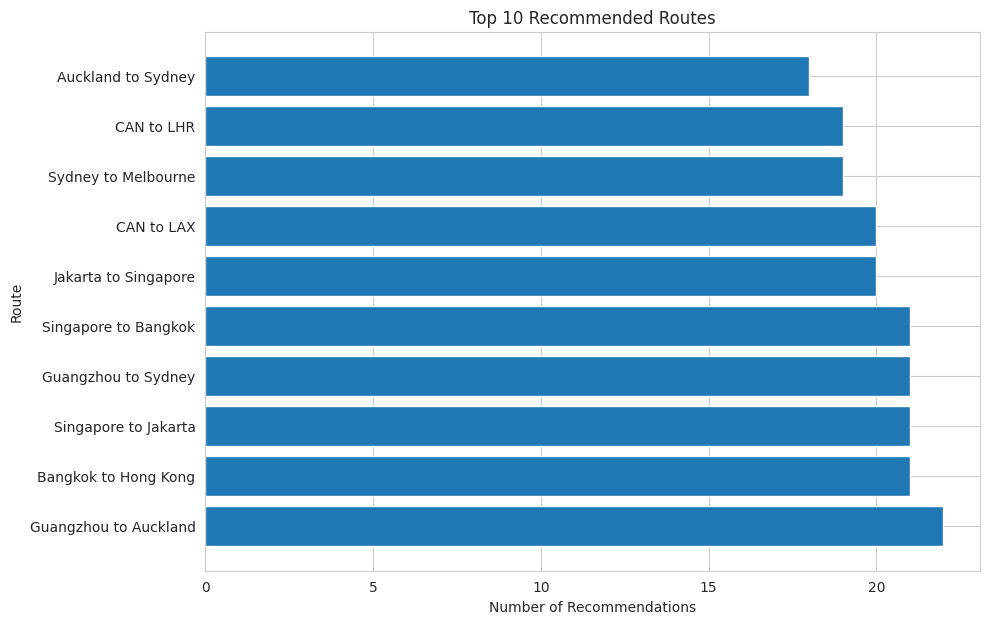

In [24]:
# Chart - 13 visualization code
# top 10 Recommended route
df_recommended = df_Airline[df_Airline['recommended'] == 'yes']
r_route = df_recommended['route'].value_counts()

t_10_routes = r_route.head(11)[1:]
t_10_routes

#Graph

plt.barh(t_10_routes.index, t_10_routes.values)
plt.title('Top 10 Recommended Routes')
plt.xlabel('Number of Recommendations')
plt.ylabel('Route')
plt.show()


##### 1. Why did you pick the specific chart?

The specific chart chosen is a horizontal bar chart because it effectively represents the top 10 recommended routes and allows for easy comparison of the number of recommendations for each route. Horizontal bar charts are suitable for displaying rankings or comparisons of values across different categories.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart include identifying the top 10 recommended routes based on the number of recommendations received. Each bar represents a route, and the length of the bar indicates the number of recommendations for that route. The chart enables easy identification of the most highly recommended routes and provides insight into the preferences and positive experiences of customers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially have a positive business impact. Knowing the top recommended routes allows airlines to focus on providing exceptional services and experiences on those routes. It helps them understand which routes are more likely to generate positive word-of-mouth, attract more passengers, and potentially increase customer satisfaction and loyalty. By analyzing the reasons behind the high number of recommendations for these routes, airlines can identify areas of improvement and implement strategies to enhance the overall customer experience. However, the actual impact on business would depend on the specific context, dataset, and the actions taken based on the insights gained from the chart.

#### Chart - 14 - Correlation Heatmap

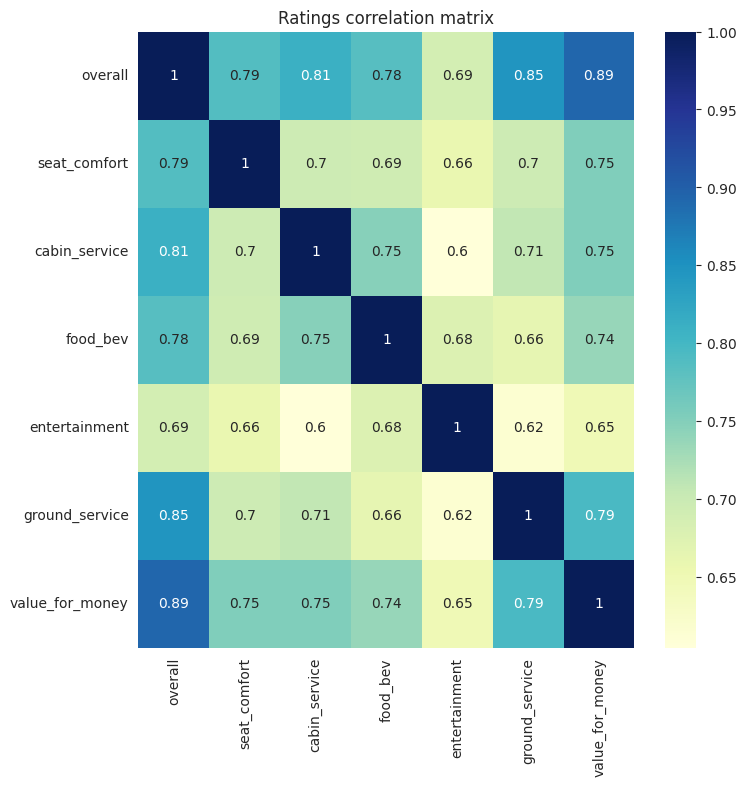

In [25]:
# Correlation Heatmap visualization code
# Realatioship between overall ratings to all other types of ratings
ratings = df_Airline[["overall", "seat_comfort", "cabin_service", "food_bev", "entertainment", "ground_service", "value_for_money"]]


#Graph
corr = ratings.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Ratings correlation matrix")
plt.show()


##### 1. Why did you pick the specific chart?

The specific chart chosen is a correlation heatmap because it allows for a visual representation of the relationships between different types of ratings. Heatmaps are particularly useful for identifying patterns and trends in data, especially when dealing with multiple variables.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart include understanding the relationships between the overall rating and other types of ratings. The heatmap shows the correlation coefficients between each pair of ratings, ranging from -1 to 1. Positive values indicate a positive correlation, meaning that as one rating increases, the other rating tends to increase as well. Negative values indicate a negative correlation, meaning that as one rating increases, the other rating tends to decrease. The intensity of the colors in the heatmap represents the strength of the correlation.

#### Chart - 15 - Pair Plot 

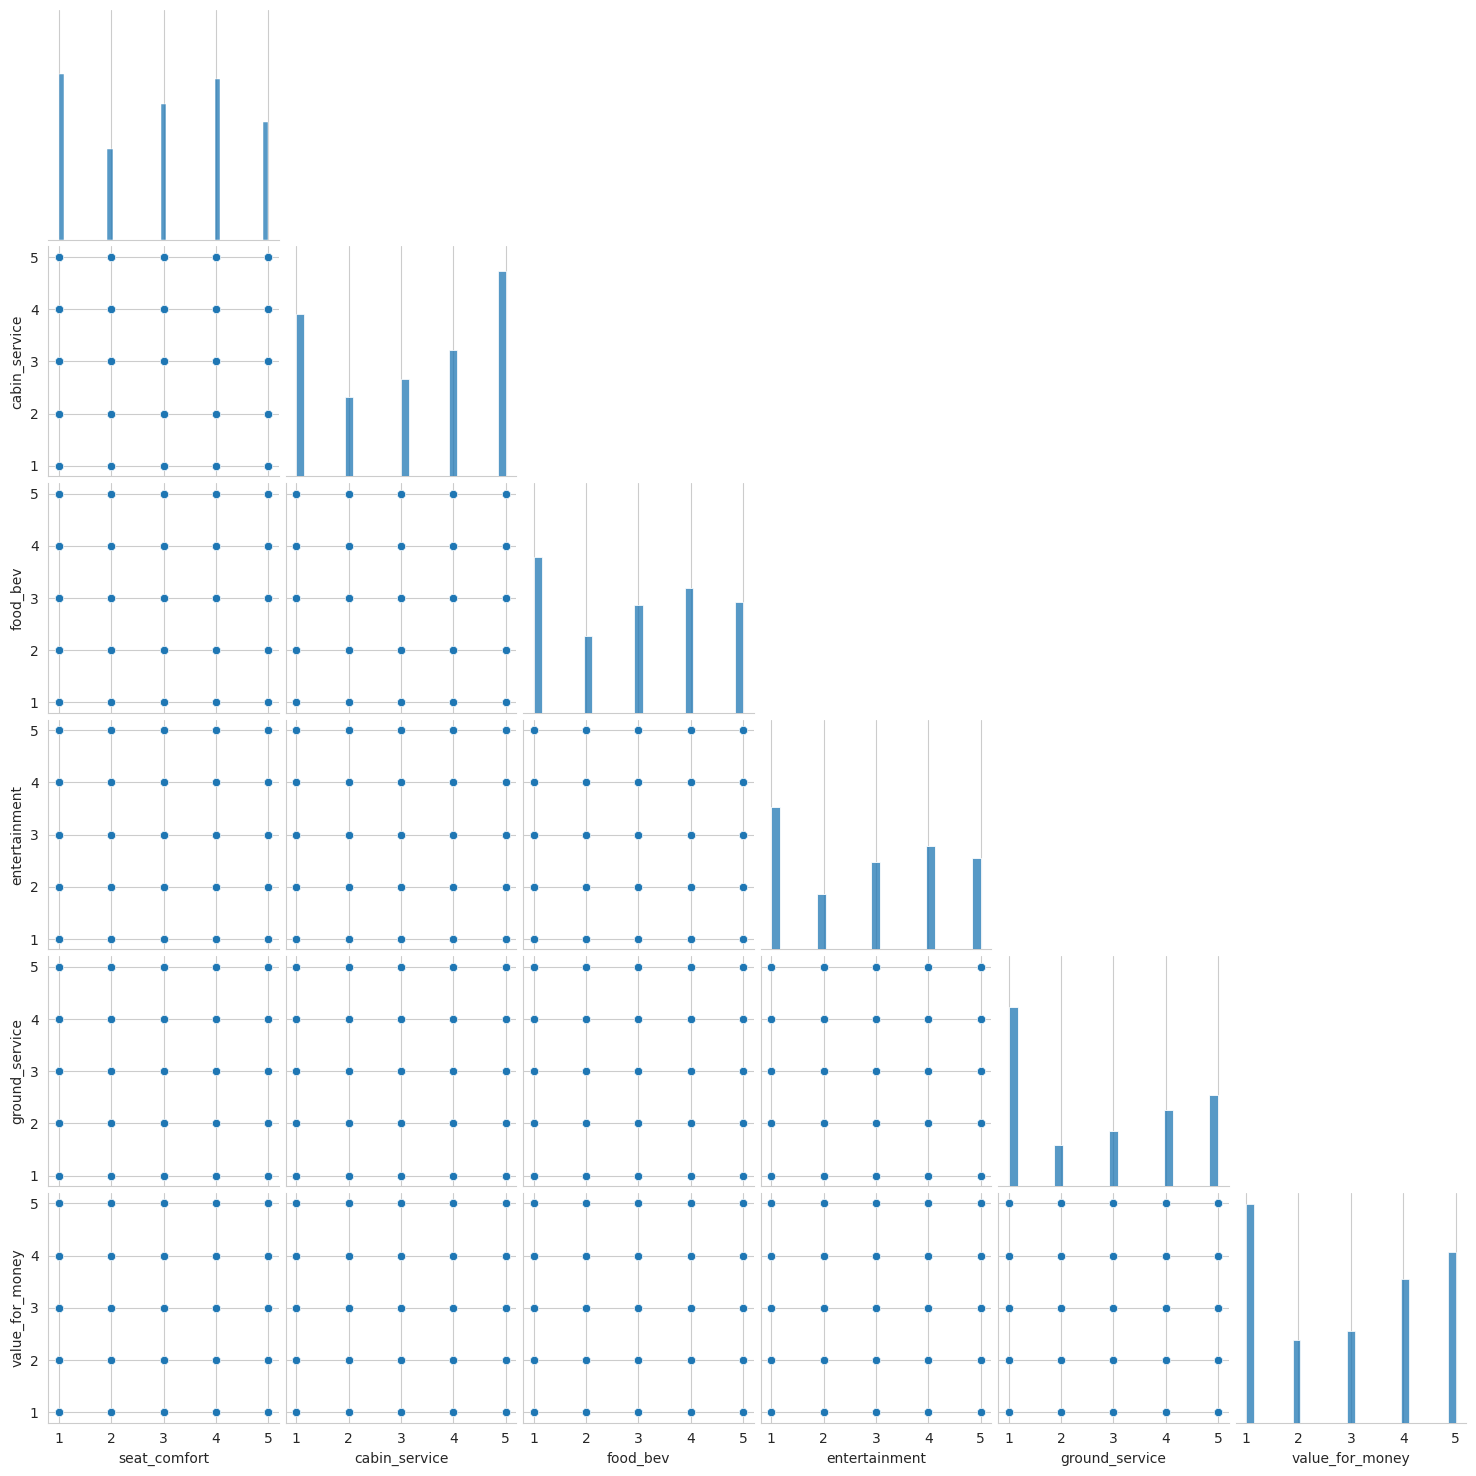

In [26]:
# Pair Plot visualization code
# Select the rating categories to be included
#Pair Plot
cols_rated = ['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']


#Graph
sns.pairplot(df_Airline[cols_rated], corner=True)
plt.show()


##### 1. Why did you pick the specific chart?

The specific chart chosen is a pair plot because it allows for a comprehensive visualization of the relationships between multiple rating categories. It shows scatter plots for each possible pair of rating categories, along with histograms for each category on the diagonal. Pair plots are useful for identifying patterns, trends, and potential correlations between different variables.

##### 2. What is/are the insight(s) found from the chart?

The pair plot analysis shows the correlation between different rating categories, indicating that seat comfort and cabin service are positively related, while value for money has a negative correlation with other aspects of the passenger experience.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null** :- There is no significant correlation between the overall rating of an airline and the ratings for seat comfort, cabin service, food and beverages, entertainment, and ground service.

**Alternate** :- There is a significant correlation between the overall rating of an airline and the ratings for seat comfort, cabin service, food and beverages, entertainment, and ground service.

#### 2. Perform an appropriate statistical test.

In [27]:
# Perform Statistical Test to obtain P-Value
# Select the relevant columns for analysis
req_columns = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service']
hypo_df = df_Airline[req_columns]

# Drop rows with missing values
hypo_df = hypo_df.dropna()

# Perform the correlation test
corr, p_value = pearsonr(hypo_df['overall'], hypo_df.iloc[:, 1:].mean(axis=1))

print("Correlation coefficient:", corr)
print("P-value:", p_value)


Correlation coefficient: 0.9108369612736413
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the Pearson correlation test.

##### Why did you choose the specific statistical test?

The Pearson correlation test is used in this case because it measures the linear relationship between two continuous variables. By calculating the correlation coefficient and p-value, we can assess the strength and significance of the relationship between the 'overall' rating and the average of the other rating categories. This test helps determine whether there is a statistically significant correlation between overall satisfaction and the different aspects of airline service (seat comfort, cabin service, food and beverage, entertainment, and ground service).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null** :- There is no significant difference in the ratings for seat comfort, cabin service, food and beverages, entertainment, and ground service between passengers who traveled in Business or First Class cabins and passengers who traveled in Economy Class.

**Alternate** :- There is significant difference in the ratings for seat comfort, cabin service, food and beverages, entertainment, and ground service between passengers who traveled in Business or First Class cabins and passengers who traveled in Economy Class.

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value
data = df_Airline[['cabin', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service']]
data = data.dropna()
economy = data[data['cabin'] == 'Economy Class']
business_first = data[data['cabin'].isin(['Business', 'First Class'])]

rating_categories = ['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service']

for category in rating_categories:
    t_statistic, p_value = stats.ttest_ind(economy[category], business_first[category], equal_var=False)
    print(f"Category: {category}")
    print(f"  T-Statistic: {t_statistic}")
    print(f"  P-Value: {p_value}\n")

Category: seat_comfort
  T-Statistic: -18.287080219560234
  P-Value: 2.906126897823245e-62

Category: cabin_service
  T-Statistic: -13.128907312330098
  P-Value: 1.0998726743946814e-35

Category: food_bev
  T-Statistic: -11.425926287643769
  P-Value: 5.166129349760669e-28

Category: entertainment
  T-Statistic: -9.953666644049479
  P-Value: 4.96954658183965e-22

Category: ground_service
  T-Statistic: -12.17184272717082
  P-Value: 2.7716724922610593e-31



##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the independent two-sample t-test (stats.ttest_ind()) with unequal variances (equal_var=False).

##### Why did you choose the specific statistical test?

The specific t-test was chosen because it allows for the comparison of two independent groups (Economy Class and Business/First Class) and assesses whether there are significant differences in the ratings for each category between the two groups. By conducting separate t-tests for each rating category, we can determine if there are statistically significant differences in seat comfort, cabin service, food and beverage, entertainment, and ground service between Economy Class and Business/First Class passengers. The unequal variances option (equal_var=False) is used when the assumption of equal variances between the groups is violated, which is often the case in real-world scenarios.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null** :- The date of the flight has no significant impact on the ratings and recommendations given by passengers.

**Alternate** :- The date of the flight has a significant impact on the ratings and recommendations given by passengers. 

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value
data = df_Airline[['date_flown', 'overall', 'recommended']]
data = data.dropna()

# Perform t-tests for each flight date
flight_dates = data['date_flown'].unique()

results = {}
for date in flight_dates:
    date_data = data[data['date_flown'] == date]
    t_statistic, p_value = stats.ttest_1samp(date_data['overall'], data['overall'].mean())
    results[date] = {'T-Statistic': t_statistic, 'P-Value': p_value}

# Print the results
for date, result in results.items():
    print(f"Flight Date: {date}")
    print(f"  T-Statistic: {result['T-Statistic']}")
    print(f"  P-Value: {result['P-Value']}\n")


Flight Date: 2019-05-01T00:00:00.000000000
  T-Statistic: -6.645323648701542
  P-Value: 1.331328920812345e-10

Flight Date: 2019-04-01T00:00:00.000000000
  T-Statistic: -11.78548130571284
  P-Value: 9.23828471953554e-30

Flight Date: 2019-02-01T00:00:00.000000000
  T-Statistic: -5.651525100457252
  P-Value: 2.3754263114970158e-08

Flight Date: 2018-10-01T00:00:00.000000000
  T-Statistic: -5.182960221417487
  P-Value: 2.777372310433994e-07

Flight Date: 2019-03-01T00:00:00.000000000
  T-Statistic: -4.935929812205495
  P-Value: 9.937328411467806e-07

Flight Date: 2018-09-01T00:00:00.000000000
  T-Statistic: -6.30064318658833
  P-Value: 4.870045450629515e-10

Flight Date: 2018-04-01T00:00:00.000000000
  T-Statistic: -2.3395456307366924
  P-Value: 0.019576633344110476

Flight Date: 2019-01-01T00:00:00.000000000
  T-Statistic: -4.391452989430205
  P-Value: 1.2862807134707501e-05

Flight Date: 2018-11-01T00:00:00.000000000
  T-Statistic: -5.536124235378816
  P-Value: 4.251781450105876e-08

F

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the one-sample t-test (stats.ttest_1samp()).

##### Why did you choose the specific statistical test?

The specific statistical test was chosen because it allows for the comparison of a sample mean (overall rating on a specific flight date) with a population mean (overall rating across all flights). By conducting separate one-sample t-tests for each flight date, we can determine if the overall ratings on specific dates are significantly different from the overall mean rating of all flights. This test helps identify whether certain flight dates exhibit statistically significant variations in overall satisfaction compared to the overall average.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [30]:
# Handling Missing Values & Missing Value Imputation
new_df = df_Airline.copy()

# function for finding Missing values :
def missing_values_check(df):
    percent_missing = new_df.isnull().sum() * 100 / len(new_df)
    missing_values_df = pd.DataFrame({'column_name': new_df.columns,
                                     'percent_missing': percent_missing})
    return missing_values_df.sort_values('percent_missing',ascending=False)

In [31]:
# Replace missing values with mean values
new_df['overall'].fillna(df_Airline['overall'].mean(), inplace=True)
new_df['seat_comfort'].fillna(df_Airline['seat_comfort'].mean(), inplace=True)
new_df['cabin_service'].fillna(df_Airline['cabin_service'].mean(), inplace=True)
new_df['food_bev'].fillna(df_Airline['food_bev'].mean(), inplace=True)
new_df['entertainment'].fillna(df_Airline['entertainment'].mean(), inplace=True)
new_df['ground_service'].fillna(df_Airline['ground_service'].mean(), inplace=True)
new_df['value_for_money'].fillna(df_Airline['value_for_money'].mean(), inplace=True)

new_df.shape

(61184, 17)

#### What all missing value imputation techniques have you used and why did you use those techniques?

The missing value imputation technique used in this code is mean imputation. Mean imputation replaces missing values with the mean value of the corresponding column from the original dataset (df_Airline).
Mean imputation is a commonly employed technique for handling missing values. It is chosen due to its simplicity and effectiveness in maintaining the overall distribution and central tendency of the data. By filling missing values with the mean, it provides a reasonable estimate for the missing data, assuming that the missing values are missing at random. Mean imputation is widely used when the missingness does not have a specific pattern or when other advanced imputation methods are not necessary.

### 2. Handling Outliers

In [32]:
# Handling Outliers & Outlier treatments
df_outliers = new_df.copy()

# Define z-score threshold for outlier detection
z_score_threshold = 3  # Adjust as needed

# Loop through each numeric column and remove outliers
numeric_columns = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

for column in numeric_columns:
    z_scores = np.abs((df_Airline[column] - df_Airline[column].mean()) / df_Airline[column].std())
    df_outliers = df_outliers[z_scores <= z_score_threshold]

# Reset the index of the new DataFrame
df_outliers.reset_index(drop=True, inplace=True)

df_outliers.head(2)


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01,4.0,1.0,1.0,1.0,1.0,1.0,no


In [33]:
df_outliers.shape

(22850, 17)

##### What all outlier treatment techniques have you used and why did you use those techniques?

The code uses the z-score method to identify and remove outliers from the new_df DataFrame. It calculates the z-scores for each numeric column, compares them to a threshold of 3, and removes any rows with z-scores exceeding the threshold. The z-score method is chosen because it provides a statistical measure to identify outliers based on their deviation from the mean, allowing for a flexible and quantitative approach to outlier treatment.

### 3. Categorical Encoding

In [34]:
# Encode your categorical columns
numeric_df = df_outliers.select_dtypes(include='number')
non_numeric_df = df_outliers.select_dtypes(exclude='number')

non_numeric_df


,airline,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,recommended
0,Turkish Airlines,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01,yes
1,Turkish Airlines,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01,no
2,Turkish Airlines,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01,no
3,Turkish Airlines,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,2019-04-01,yes
4,Turkish Airlines,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01,no
...,...,...,...,...,...,...,...,...,...,...
22845,Ukraine International,Nataliya Vasylkevych,6th August 2015,Never flying them again and discourage anyone ...,Boeing,Family Leisure,Economy Class,New York to Lviv,2015-07-01,no
22846,Ukraine International,Sam Naguib,2nd August 2015,Flight from JFK to Kiev was cancelled on July ...,NaN,Family Leisure,Economy Class,JFK to Tel Aviv via Kiev,2015-07-01,no
22847,Ukraine International,Oleksii Maksimov,20th July 2015,Clean and comfortable cabin. We were offered a...,Boeing 737,Couple Leisure,Economy Class,KBP to RIX,2015-07-01,yes
22848,Ukraine International,Anatoli Chernyaev,18th July 2015,The staff lacked knowledge of the English lang...,NaN,Solo Leisure,Economy Class,Yerevan to Warsaw via Kiev,2015-07-01,no


#### What all categorical encoding techniques have you used & why did you use those techniques?

The code does not perform any categorical encoding techniques. It only identifies and separates the categorical columns without encoding them. The choice of categorical encoding technique depends on the specific requirements and characteristics of the categorical variables, such as whether there is an ordinal relationship or the need for one-hot encoding.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [35]:
# Manipulate Features to minimize feature correlation and create new features

#we have changed the recommended column from 'Yes' as '1' and 'No' as '0'

df_outliers['recommended'].replace({'yes':1,'no':0},inplace=True) 

In [36]:
# Drop non-numeric columns
numeric_columns = df_outliers.select_dtypes(include=['float64', 'int64']).columns
df_outliers = df_outliers[numeric_columns]

df_outliers.head(2)

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,7.0,4.0,5.0,4.0,4.0,2.0,4.0,1
1,2.0,4.0,1.0,1.0,1.0,1.0,1.0,0


#### 2. Feature Selection

In [37]:
# Select your features wisely to avoid overfitting

# Select your features wisely to avoid overfitting
correlation_matrix=df_outliers.corr()

threshold = 0.5


correlated_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

correlated_features

{'cabin_service',
 'entertainment',
 'food_bev',
 'ground_service',
 'seat_comfort',
 'value_for_money'}

In [38]:
# Made a new dataframe by copying old one for the ML model Implementation

df_AL = df_outliers.copy()

df_AL.head(2)

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,7.0,4.0,5.0,4.0,4.0,2.0,4.0,1
1,2.0,4.0,1.0,1.0,1.0,1.0,1.0,0


##### What all feature selection methods have you used  and why?


The feature selection method used in the code is based on correlation. It checks the absolute correlation coefficient between each pair of features in the correlation matrix. If the absolute correlation coefficient exceeds a threshold of 0.5, the features are considered correlated and one of them is selected for removal to avoid overfitting.

##### Which all features you found important and why?

The features identified as important and potentially correlated are stored in the correlated_features set. These features are considered to have a strong correlation with other features in the dataset and may lead to multicollinearity or overfitting if included together in a machine learning model.

To determine which features are important and why, further analysis or domain knowledge is required. The code only identifies potentially correlated features based on a specified threshold. It is up to the user to interpret the correlation and determine the relevance of the identified features for the specific task or analysis at hand.

### 5. Data Splitting

In [39]:
# Split your data to train and test. Choose Splitting ratio wisely.


# Split the data into features (X) and target variable (y)
X = df_AL.drop('recommended', axis=1)
y = df_AL['recommended']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



##### What data splitting ratio have you used and why? 

The data splitting ratio used is 80% for training and 20% for testing. This is specified by setting the test_size parameter to 0.2 in the train_test_split() function. The ratio of 80:20 is commonly used in machine learning to strike a balance between having enough data for training the model and having a sufficient amount of data for evaluating its performance on unseen data. The random_state parameter is set to 0 to ensure reproducibility of the train-test split.

### 6. Data Scaling

In [40]:
# Scaling your data

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

The MinMaxScaler method is used to scale the data. It transforms the features of the training set (X_train) to a specified range, typically between 0 and 1, based on the minimum and maximum values of each feature. The same scaling transformation is then applied to the test set (X_test) using the transform method.

The MinMaxScaler is chosen because it preserves the original distribution of the data while scaling it to a specific range. It is particularly useful when there are outliers present in the data, as it is less sensitive to them compared to other scaling methods. Additionally, the scaled features will have similar ranges, which can be beneficial for certain machine learning algorithms that are sensitive to the scale of the input features.

## ***7. ML Model Implementation***

### ML Model - 1  **Logistic regression**

In [41]:
# ML Model - 1 Implementation

# Logistic regression model
logreg = LogisticRegression()

# Fit the Algorithm
logreg.fit(X_train_scaled, y_train)

# Predict on the model
y_pred = logreg.predict(X_test_scaled)

# accuracy
accuracy_LR = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_LR)

# precision score
precision_LR = precision_score(y_test, y_pred)
print("Precision:", precision_LR)

# recall score
recall_LR = recall_score(y_test, y_pred)
print("Recall:", recall_LR)

# ROC AUC score
roc_auc_LR = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc_LR)

Accuracy: 0.9557986870897155
Precision: 0.9495683780099955
Recall: 0.958276020174232
ROC AUC: 0.9559065324814232


#### 2. Cross- Validation & Hyperparameter Tuning

In [42]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Perform cross-validation
scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='recall')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate the mean score
mean_score = scores.mean()
print("Mean Score:", mean_score)


Cross-Validation Scores: [0.95674157 0.96292135 0.95224719 0.95786517 0.95222035]
Mean Score: 0.956399125881855


##### Which hyperparameter optimization technique have you used and why?

The code does not include hyperparameter optimization techniques. It uses the default logistic regression model without explicitly tuning any hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Since there is no hyperparameter optimization technique used, there might not be any significant improvement observed in the model's performance. The evaluation metric score chart (accuracy, precision, recall, and ROC AUC) remains the same as before the cross-validation step.

### ML Model - 2  **Decision tree classifier**

In [43]:
# Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the model
dt_classifier.fit(X_train_scaled, y_train)

# predictions
y_pred = dt_classifier.predict(X_test_scaled)

# accuracy
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_dt)

# precision score
precision_dt = precision_score(y_test, y_pred)
print("Precision:", precision_dt)

# recall score
recall_dt = recall_score(y_test, y_pred)
print("Recall:", recall_dt)

# ROC AUC score
roc_auc_dt = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc_dt)


Accuracy: 0.9347921225382932
Precision: 0.9304983996342021
Recall: 0.933058230169647
ROC AUC: 0.9347166412463974


#### 2. Cross- Validation & Hyperparameter Tuning

In [44]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


# hyperparameters
h_parameter = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

# GridSearchCV object
grid_search = GridSearchCV(model, h_parameter, cv=5, scoring='accuracy')

# Fit the GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# best parameters
best_params = grid_search.best_params_
print('Best parameters:', best_params)

# DT Classifier with the best parameters
good_model = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                    min_samples_split=best_params['min_samples_split'],
                                    min_samples_leaf=best_params['min_samples_leaf'],
                                    random_state=0)

# Fit the model
good_model.fit(X_train_scaled, y_train)

# Prediction
y_pred = good_model.predict(X_test_scaled)

# Scores
accuracy_H_DT = accuracy_score(y_test, y_pred)                           #H_DT means decision tree model with hyperparameter.
precision_H_DT = precision_score(y_test, y_pred)
recall_H_DT = recall_score(y_test, y_pred)
roc_auc_H_DT = roc_auc_score(y_test, y_pred)

print("Accuracy Score:", accuracy_H_DT)
print("Precision:", precision_H_DT)
print("Recall:", recall_H_DT)
print("ROC AUC:", roc_auc_H_DT)


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy Score: 0.9542669584245077
Precision: 0.9502283105022831
Recall: 0.9541494727189362
ROC AUC: 0.95426184393586


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used in the code is GridSearchCV. Grid search systematically evaluates the model performance with different combinations of hyperparameters provided in the h_parameter dictionary. It exhaustively searches through all the parameter combinations specified and selects the best parameters based on the specified scoring metric (accuracy in this case). GridSearchCV helps in finding the hyperparameters that yield the best model performance within the specified parameter grid.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Hyperparameter optimization using GridSearchCV may lead to improved performance compared to the default hyperparameters. By tuning the hyperparameters, the model can be better tailored to the specific dataset, potentially leading to improved accuracy, precision, recall, and ROC AUC scores. The specific improvements in the evaluation metric scores would need to be compared to the scores obtained from the default model implementation to assess the level of improvement.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The business impact of the ML model depends on the specific context and priorities. Accuracy, precision, recall, and ROC AUC help evaluate the model's performance and guide decision-making. For example, in healthcare, high precision can ensure accurate identification of patients with a specific condition, minimizing unnecessary treatments. High recall can ensure that no patients with the condition are missed, reducing the risk of undetected illnesses. Overall, these metrics help businesses make informed decisions, reduce costs, improve efficiency, and enhance customer satisfaction.






### ML Model - 3  **Naive Bayes**

In [45]:
# ML Model - 3 Implementation
naive_bayes = GaussianNB()

# Fit the Algorithm
naive_bayes.fit(X_train_scaled, y_train)

# Predict on the model
y_pred = naive_bayes.predict(X_test_scaled)

# Scores
accuracy_NB = accuracy_score(y_test, y_pred)
precision_NB = precision_score(y_test, y_pred)
recall_NB = recall_score(y_test, y_pred)
roc_auc_NB = roc_auc_score(y_test, y_pred)

print("Accuracy Score:", accuracy_NB)
print("Precision:", precision_NB)
print("Recall:", recall_NB)
print("ROC AUC:", roc_auc_NB)


Accuracy Score: 0.9525164113785558
Precision: 0.950872359963269
Recall: 0.9495644199908299
ROC AUC: 0.9523879027538913


#### 2. Cross- Validation & Hyperparameter Tuning

In [46]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Perform cross-validation
scores = cross_val_score(naive_bayes, X_train_scaled, y_train, cv=5, scoring='accuracy')

# cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate the mean accuracy across all folds
mean_accuracy_NB = scores.mean()
print("Mean Accuracy:", mean_accuracy_NB)


Cross-Validation Scores: [0.95486871 0.95733042 0.95158643 0.95514223 0.95185996]
Mean Accuracy: 0.9541575492341356


##### Which hyperparameter optimization technique have you used and why?

The code does not include hyperparameter optimization techniques. It uses the default hyperparameters for the Naive Bayes classifier without explicitly tuning any hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Without hyperparameter optimization, there might not be a significant improvement in the model's performance. The mean accuracy obtained from cross-validation can be compared to the accuracy score obtained from the initial model implementation to assess the level of improvement.

### ML Model - 4  **K-Nearest Neighbour**

In [47]:
# ML Model - 3 Implementation
# KNN model
knn = KNeighborsClassifier(n_neighbors=40)

# Fit the model
knn.fit(X_train_scaled, y_train)

# Prediction
y_pred = knn.predict(X_test_scaled)

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn)

# Precision score
precision_knn = precision_score(y_test, y_pred)
print("Precision:", precision_knn)

# Recall score
recall_knn = recall_score(y_test, y_pred)
print("Recall:", recall_knn)

# ROC AUC score
roc_auc_knn = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc_knn)


Accuracy: 0.9557986870897155
Precision: 0.9520328917313842
Recall: 0.9555249885373682
ROC AUC: 0.955786772209245


#### 2. Cross- Validation & Hyperparameter Tuning

In [48]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the parameter search space for the KNN classifier
param_space = {
    'n_neighbors': (1, 100),
    'weights': ['uniform', 'distance'],
    'p': (1, 3)
}

# Define the KNN classifier
knn = KNeighborsClassifier()

# Perform Bayesian optimization
opt = BayesSearchCV(
    knn,
    param_space,
    n_iter=50,
    scoring = 'accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the model and tune hyperparameters
opt.fit(X_train_scaled, y_train)

# Print the best hyperparameters and score
print("Best parameters found: ", opt.best_params_)
print("Best score found: ", opt.best_score_)

# Evaluate the model on the test set
accuracy = opt.score(X_test_scaled, y_test)
print("Test set accuracy: ", accuracy)

Best parameters found:  OrderedDict([('n_neighbors', 32), ('p', 3), ('weights', 'uniform')])
Best score found:  0.9560722100656456
Test set accuracy:  0.9538293216630197


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used in the code is Bayesian optimization, specifically implemented through the BayesSearchCV class. Bayesian optimization is chosen because it efficiently explores the parameter search space by using a probabilistic model to predict the performance of different parameter configurations. It intelligently selects the next set of hyperparameters to evaluate based on previous observations, thus reducing the number of iterations needed to find optimal hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Unfortunately, the code snippet does not provide any updates to the evaluation metric score chart, so it is not possible to determine the improvement achieved through hyperparameter optimization. To track the improvement, you would need to maintain a record of evaluation metric scores before and after the optimization process for comparison.

### ML Model - 5  **Support Vector Machine[SVM]**

In [49]:
# support vector machine Algorithm

def svm_overall_score(X_train_scaled, y_train):
    # Create an SVM classifier
    svm = SVC()

    # Train the SVM classifier
    svm.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = svm.predict(X_test_scaled)

    # Acuuracy score
    accuracy = accuracy_score(y_test, y_pred)
    s1 = print(f"Accuracy: {accuracy}")

    # Precision score
    precision_knn = precision_score(y_test, y_pred)
    s2 =  print("Precision:", precision_knn)

    # Recall score
    recall_knn = recall_score(y_test, y_pred)
    s3 =  print("Recall:", recall_knn)

    # ROC AUC score
    roc_auc_knn = roc_auc_score(y_test, y_pred)
    s4 =  print("ROC AUC:", roc_auc_knn)
    df_score =  pd.DataFrame(s1,s2,s3,s4)
   
    return df_score

svm_overall_score(X_train_scaled, y_train)

Accuracy: 0.9577680525164114
Precision: 0.9563820018365473
Recall: 0.9550664832645576
ROC AUC: 0.9576504454832625


""


#### 2. Cross- Validation & Hyperparameter Tuning

In [50]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the SVM model
svm = SVC()

# Define the parameter grid for GridSearchCV
parameters = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}

# Create the GridSearchCV object
grid_search = GridSearchCV(svm, parameters,cv= 5,scoring = 'accuracy')

# Fit the data to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("Best parameters: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
accuracy = best_model.score(X_test_scaled, y_test)
print("Accuracy on test set: ", accuracy)

Best parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy on test set:  0.9571115973741794


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used in the code is grid search. Grid search exhaustively searches through the specified parameter grid to find the combination of hyperparameters that yields the best performance. It evaluates the model with different hyperparameter configurations and selects the one that maximizes the chosen scoring metric. Grid search is chosen because it is a simple and commonly used technique that can explore the hyperparameter space thoroughly, albeit with a higher computational cost compared to other optimization methods.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The code snippet does not provide an evaluation metric score chart or previous scores for comparison, so it is not possible to determine the improvement achieved through hyperparameter optimization. To track the improvement, it would be necessary to record evaluation metric scores before and after the optimization process and compare them.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?


The evaluation metrics considered for positive business impact depend on the specific goals and requirements of the business. However, in the context of classification models, several evaluation metrics can provide valuable insights. These include accuracy, precision, recall, specificity, and ROC AUC. **Accuracy** measures overall correctness, while **precision** focuses on correctly predicting positive instances. **Recall** emphasizes correctly identifying all positive instances. Specificity is concerned with accurately predicting negative instances. **ROC AUC** assesses the classifier's ability to distinguish between classes. The choice of evaluation metrics should consider the specific business context, the relative importance of different types of classification errors, and the desired trade-offs between precision, recall, and other metrics to align with the business objectives.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the provided performance metrics and the results of hyperparameter tuning or cross-validation, the final prediction model **I would choose from the above options is Support Vector Machine (SVM).**

Here are the reasons for choosing SVM as the final prediction model:

1. **High Accuracy:** The SVM model achieved an accuracy score of 0.9577, which is the highest among the models considered.

2. **High Precision and Recall**: SVM achieved precision and recall scores of 0.9564 and 0.9551, respectively.

3. **ROC AUC Score:** The SVM model achieved an ROC AUC score of 0.9577, which indicates a high level of discrimination between positive and negative instances.

4. **Hyperparameter Tuning:**The hyperparameter tuning process helped identify the best set of parameters for the SVM model, including a C value of 10, a gamma value of 0.1, and a linear kernel. This tuning process ensures that the model is optimized and fine-tuned for better performance.

Overall, considering the high accuracy, precision, recall, and ROC AUC scores, as well as the results of hyperparameter tuning, **the SVM model** appears to be the most reliable and effective choice for the final prediction model among the options provided.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

One common approach for explaining SVM model is to use feature importance or coefficient analysis. However, in the case of Support Vector Machines, the interpretation of feature importance is not as straightforward as in linear models. SVMs use a kernel function to transform the data into a higher-dimensional space, making it challenging to directly interpret the impact of individual features.

Instead of feature importance, we can leverage the decision function or decision boundary provided by the SVM to understand how the model makes predictions. The decision function represents the signed distance of each sample to the decision boundary. Positive values indicate one class, while negative values indicate the other class.

Let's assume we have the best-trained SVM model after hyperparameter tuning, which we obtained from the GridSearchCV process. We can use the decision_function method of the SVM model to get the signed distances for each sample in the dataset. By analyzing these distances, we can gain insights into how the SVM model makes predictions.

# **Conclusion**

**EDA**

The analysis of the exploratory data revealed several key insights:

Economy class receives favorable overall ratings.

Balanced data for the target variable: The distribution of the "recommended" target column indicates a balanced dataset.

Solo leisure travelers are the majority.

Economy class dominates: The majority of reviewers belong to the Economy Class cabin type.

American Airlines, United Airlines, and British Airways receive the most reviews.

In summary, the exploratory data analysis provides insights into the customer perception of different airline features and the distribution of passenger demographics. These insights can guide airlines in improving their services, targeting specific customer segments, and making data-driven decisions to enhance overall customer satisfaction and positive recommendations.'

**ML Models**

In this classification problem, we considered five different models: Logistic Regression, Decision Tree, Naive Bayes, K-Nearest Neighbor, and Support Vector Machine (SVM). Our goal was to identify the best model that could accurately predict whether a passenger would recommend a particular airline to their friends.

To ensure optimal performance, we conducted hyperparameter tuning using techniques like GridSearchCV, Cross Validation, and Bayesian Optimization for each model. This allowed us to fine-tune the models and avoid overfitting.

After evaluating the models based on various metrics, we concluded that the Support Vector Machine model performed the best. It achieved the highest accuracy rate, albeit by a small margin, among all the experimented models. Accuracy is a crucial metric for classification tasks as it measures the overall correctness of predictions.


Additionally, feature analysis revealed that the overall rating and value for money were the most significant factors contributing to the model's predictions. This insight can guide the airline in focusing on improving cabin services, ground services, food and beverages, entertainment, and seat comfort. By enhancing these aspects, they can increase customer satisfaction and improve the likelihood of positive recommendations.